# **Customer Lifetime Value**
### Created by : Joash Christian Chandra

# Business Problem Understanding

**Background**

Recognizing the importance of understanding the long-term value of its customers, a car insurance company aims to optimize marketing strategies, prioritize resource allocation, and enhance profitability. Accurately predicting Customer Lifetime Value (CLV) allows the car insurance company to forecast future revenue streams and better understand the overall value that each customer contributes to the business over their lifetime. This insight enables the car insurance company to make informed decisions regarding customer acquisition, retention, and engagement strategies. By leveraging CLV predictions, the car insurance company can allocate resources more efficiently, target marketing efforts more effectively, and ultimately improve its bottom line.

**Problem Statement**

The car insurance company lacks a dependable method to anticipate the future value of individual customers over their tenure with the company. In the absence of accurate CLV predictions, the company encounters challenges in allocating marketing budgets optimally, distinguishing between high and low-value customers, and implementing tailored retention tactics.

**Goals**

Given the stated problem, the primary objective is to develop an accurate prediction model for the company's Customer Lifetime Value (CLV).

**Analytic Approach**

Firstly, we will clean and preprocess the dataset by addressing missing values, duplicated data, and outliers. Subsequently, we will perform exploratory data analysis to uncover underlying patterns and relationships within the dataset. Once we have gained insights from the data, we will split it into features and target variables. Following this, we will compare the datasets with and without outliers, as well as with and without scaling. Next, we will select the top three models and perform hyperparameter tuning to determine the best model among them.

**Metric Evaluation**

1. **Root Mean Squared Error (RMSE)**: Measures the average magnitude of errors between predicted and actual CLV values. Lower RMSE values indicate better accuracy, indicating that predictions are closer to the actual values.
2. **Mean Absolute Error (MAE)**: Calculates the average absolute difference between predicted and actual CLV values. Lower MAE values represent smaller prediction errors and better model performance.
3. **R-Squared (R^2)**: Evaluates the goodness of fit of the CLV prediction model by quantifying the proportion of variance in CLV values explained by the model. Higher R-squared values signify better model performance and capture more variability in CLV.
4. **Mean Absolute Percentage Error (MAPE)**: Computes the average percentage difference between predicted and actual CLV values. MAPE offers insights into relative prediction accuracy, considering the scale of values. It's expressed as a percentage.

MAPE is chosen because it provides insights into how accurate the CLV predictions are relative to the actual values, regardless of their scale. It calculates the average percentage difference between predicted and actual CLV values, making it easy to interpret and compare across different datasets or models.

# **Data Understanding**

- The dataset is about the Customer lifetime value of a vehicle insurance company.

**Attributes Information**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | This column categorizes vehicles into different classes |
| Coverage | Object | This column reflects the level of insurance coverage chosen by the customer |
| Renew Offer Type | Object | This column indicates the type of renewal offer extended to the customer |
| EmploymentStatus | Object | This column describes the employment status of the customer |
| Marital Status | Object | This column indicates the marital status of the customer  |
| Education | Object | This column describes the highest level of education of the customer |
| Number of Policies | Float | This column indicates the total number of policies held by the customer with the insurance company |
| Monthly Premium Auto | Float | This column indicates the monthly premium amount of money paid monthly for auto insurance |
| Total Claim Amount | Float | This column represents the total amount claimed by each customer |
| Income | Float | This column represents the income of each customer |
| Customer Lifetime Value | Float | This column represent the lifetime value of the customer to the insurance company |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

### **Loading Data**

In [2]:
clv = pd.read_csv('Data/data_customer_lifetime_value.csv')
clv

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


The data consist of 5669 rows and 11 columns.

### **Dataset Info**

In [23]:
pd.set_option('display.max_colwidth', None)

listItem = []
for i in clv.columns :
    listItem.append([i, 
                     clv[i].dtype,
                     clv[i].isna().sum(),
                     round((clv[i].isna().sum()/len(clv[i])) * 100,2),
                    clv[i].nunique(),
                    clv[i].drop_duplicates().sample(3).values])

pd.DataFrame(listItem, columns=['Features', 'Type', 'null', 'nullPct', 'unique', 'uniqueSample'])


,Features,Type,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Two-Door Car, SUV, Luxury Car]"
1,Coverage,object,0,0.0,3,"[Premium, Extended, Basic]"
2,Renew Offer Type,object,0,0.0,4,"[Offer2, Offer4, Offer1]"
3,EmploymentStatus,object,0,0.0,5,"[Unemployed, Employed, Retired]"
4,Marital Status,object,0,0.0,3,"[Married, Single, Divorced]"
5,Education,object,0,0.0,5,"[Bachelor, Doctor, College]"
6,Number of Policies,float64,0,0.0,9,"[6.0, 7.0, 2.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[128.0, 91.0, 156.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[48.046869, 984.170299, 1267.709661]"
9,Income,float64,0,0.0,3625,"[28280.0, 85942.0, 64749.0]"


## **Data Cleaning**

Before further understanding the data, we will first do data cleaning

### **Missing Value**

In [6]:
clv.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

There is no missing value to be found

### **Duplicate**

In [7]:
clv.duplicated().sum()

618

There is 618 data that is duplicated, dropping the duplicated data to avoid any bias in the prediction

In [8]:
clv.drop_duplicates(inplace=True)

In [9]:
clv.shape[0]

5051

### **Outliers**

In [ ]:
plt.figure(figsize=(12, 8))
numerical_vars = clv.select_dtypes(include='float64').columns
for i in range(len(numerical_vars)):
        sns.boxplot(clv[i])
        plt.title(f'Box Plot of {i}')
        plt.grid(True)
plt.tight_layout()
plt.show()

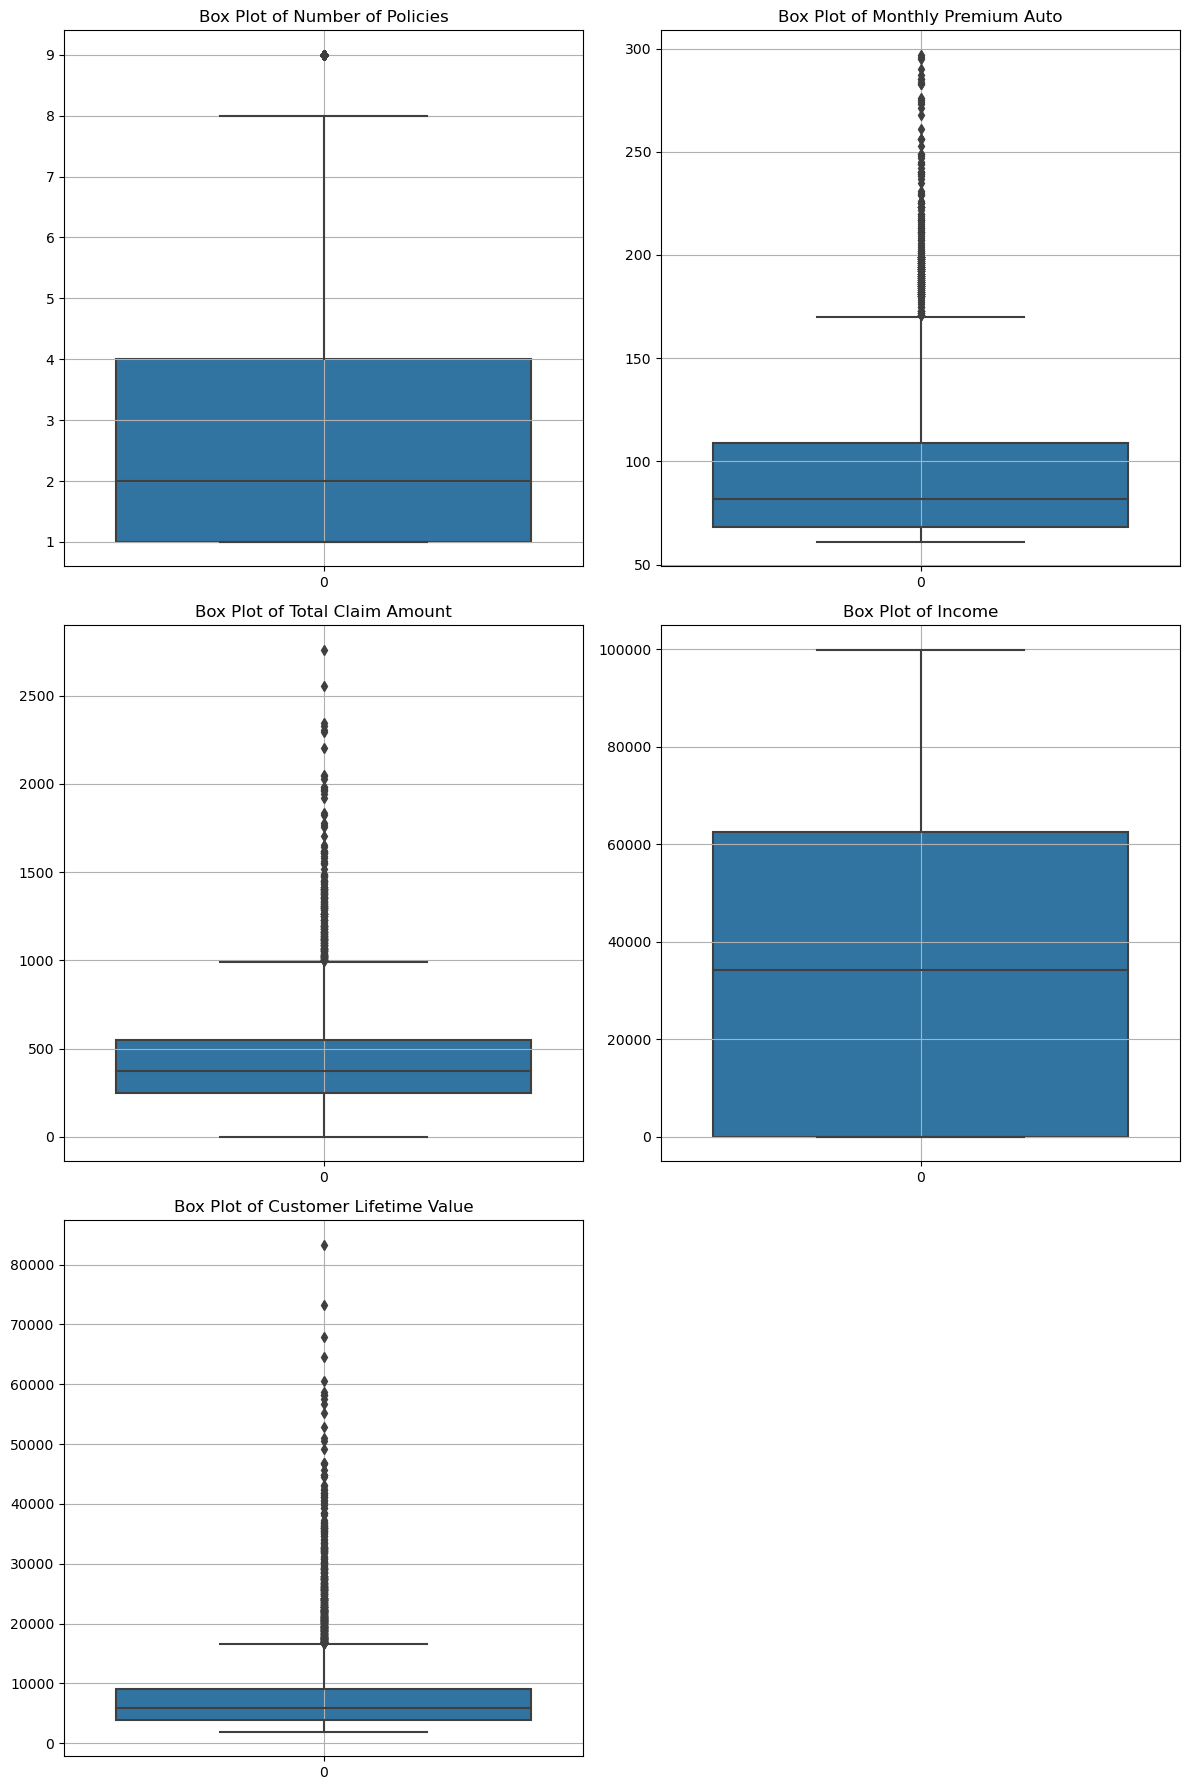

In [10]:
num_cols = len(clv.columns)
fig = plt.figure(figsize=(12, 18))

col_index = 1
for column in clv.columns:
    if clv[column].dtype in [ 'float64']:
        plt.subplot(3, 2, col_index)
        sns.boxplot(clv[column])
        plt.title(f'Box Plot of {column}')
        plt.grid(True)
        col_index += 1
        if col_index > num_cols:
            break

# Adjust layout
plt.tight_layout()
plt.show()

It was observed that out of the 5 numeric columns in the dataset, namely number of policies, monthly auto premium, total claim amount, and customer lifetime value, 4 of them contained outliers. Notably, 3 out of these 4 columns exhibited extreme outlier conditions, specifically monthly auto premium, total claim amount, and customer lifetime value.

It has been determined that we will filter out the data containing outliers into a new dataset. Subsequently, we will compare the performance of models trained on the datasets with and without outliers to determine the superior model.

In [4]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(clv, columns):
    
    Q1 = clv[columns].quantile(0.25)
    Q3 = clv[columns].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where any value in the specified columns falls outside the bounds
    clv_filtered = clv[~((clv[columns] < lower_bound) | (clv[columns] > upper_bound)).any(axis=1)]
    
    return clv_filtered

clv_filtered = remove_outliers_iqr(clv, columns=['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount','Income',  'Customer Lifetime Value'])


In [15]:
clv_filtered.shape[0]

4630

In [12]:
clv_filtered.shape[0] / clv.shape[0] * 100

81.67225260186981

**18.3%** of the data consists of outliers, this resulted in **81.7%** of the data that will be used in the filtered data.

## **Exploratory Data Analysis**

### **Correlation Check**

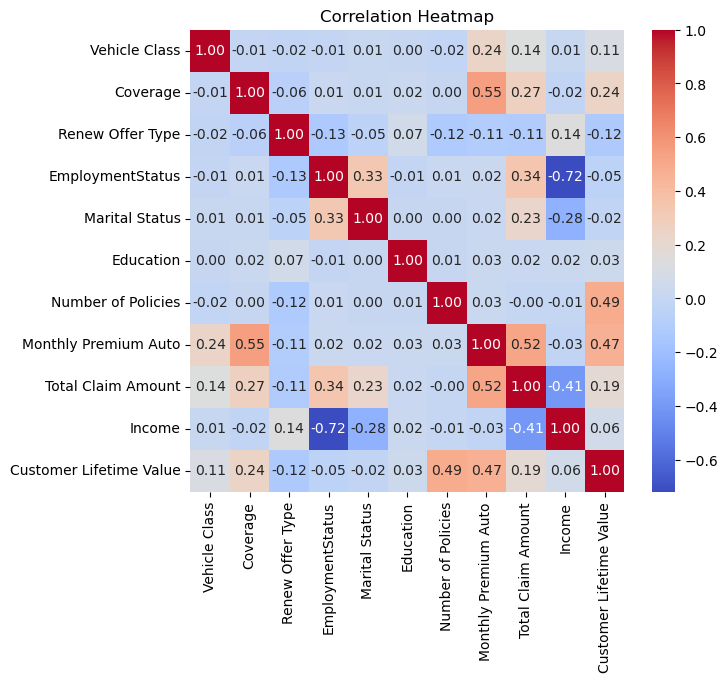

In [181]:
# Encode categorical variables
df_encoded = clv.copy()
for col in clv.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(clv[col])

# Compute and visualize correlation matrix
plt.figure(figsize=(7, 6))
sns.heatmap(df_encoded.corr('spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Customer lifetime value shows the highest correlation with the number of policies and monthly premium auto

### **Vehicle Class**

In [123]:
vehicle_class = clv['Vehicle Class'].value_counts()
vehicle_class

Vehicle Class
Four-Door Car    2565
Two-Door Car     1059
SUV               963
Sports Car        262
Luxury SUV        101
Luxury Car        101
Name: count, dtype: int64

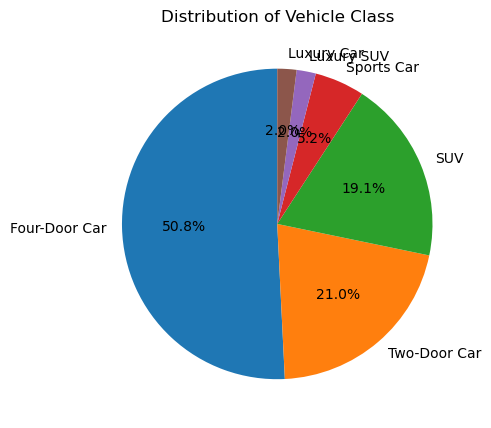

In [124]:
plt.figure(figsize=(5, 5))

plt.pie(vehicle_class, labels=vehicle_class.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Vehicle Class')

plt.tight_layout()
plt.show()

**50.8%** of customers have registered a Four-Door Class.

### **Coverage**

In [121]:
coverage = clv['Coverage'].value_counts()
coverage

Coverage
Basic       3100
Extended    1517
Premium      434
Name: count, dtype: int64

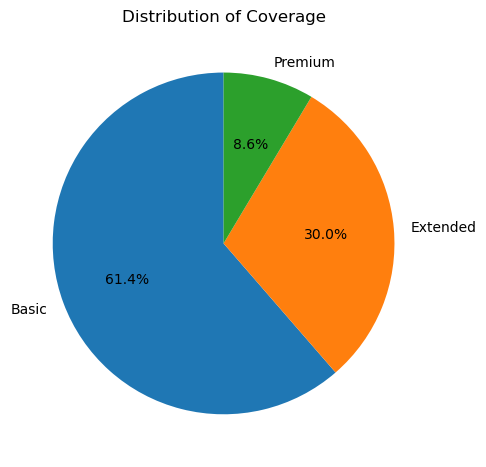

In [122]:
plt.figure(figsize=(5, 5))

plt.pie(coverage, labels=coverage.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Coverage')

plt.tight_layout()
plt.show()

**61.4%** of customers apply for basic coverage.

### **Renew Offer Type**

In [119]:
renew = clv['Renew Offer Type'].value_counts()
renew

Renew Offer Type
Offer1    2019
Offer2    1505
Offer3     885
Offer4     642
Name: count, dtype: int64

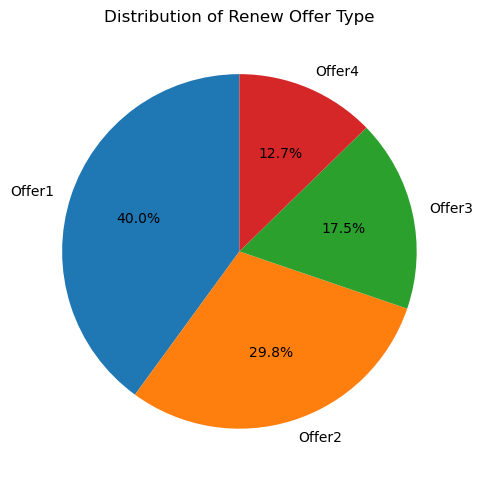

In [120]:
plt.figure(figsize=(5, 5))

plt.pie(renew, labels=renew.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Renew Offer Type')

plt.tight_layout()
plt.show()

**40%** of customers renew for Offer1.

### **Employment Status**

In [125]:
employment = clv['EmploymentStatus'].value_counts()
employment

EmploymentStatus
Employed         3187
Unemployed       1332
Medical Leave     232
Disabled          216
Retired            84
Name: count, dtype: int64

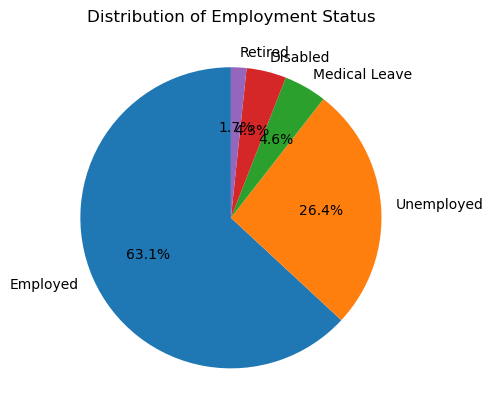

In [126]:
plt.figure(figsize=(5, 5))

plt.pie(employment, labels=employment.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Employment Status')

plt.tight_layout()
plt.show()

**63.1%** of customers are employed / have jobs.

### **Marital Status**

In [114]:
marital = clv['Marital Status'].value_counts()
marital

Marital Status
Married     2986
Single      1374
Divorced     691
Name: count, dtype: int64

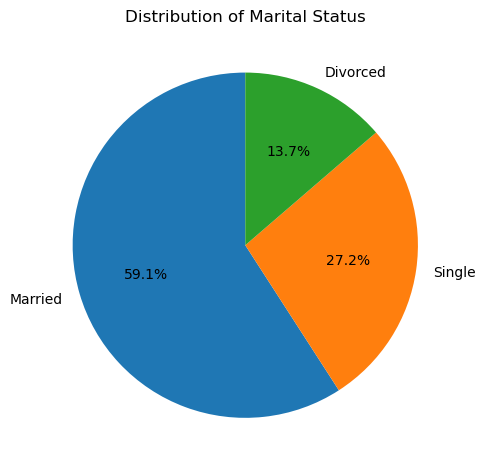

In [115]:
plt.figure(figsize=(5, 5))

plt.pie(marital, labels=marital.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Marital Status')

plt.tight_layout()
plt.show()

**59.1%** of customers are married.

### **Education**

In [127]:
education = clv['Education'].value_counts()
education

Education
Bachelor                1529
College                 1474
High School or Below    1450
Master                   397
Doctor                   201
Name: count, dtype: int64

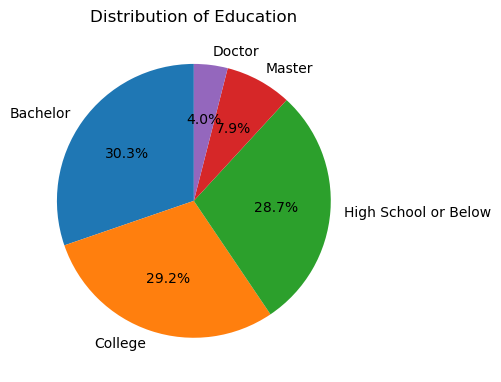

In [145]:
plt.figure(figsize=(5, 5))

plt.pie(education, labels=education.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Education')

plt.tight_layout()
plt.show()

**30.3%** of customers have a bachelor's degree, **29.2%** have a college education, and **28.7%** have a high school diploma or lower education level.

### **Number of Policies**

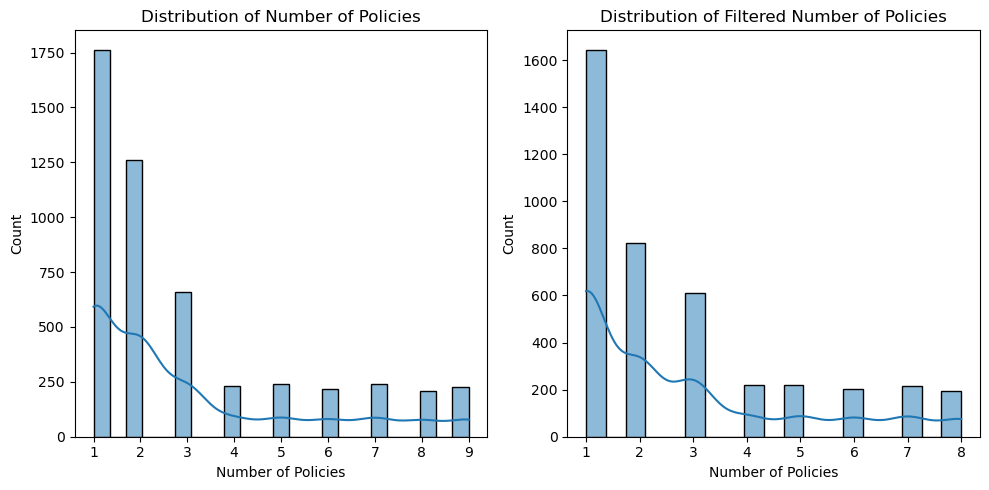

In [176]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(clv['Number of Policies'], kde=True)
plt.title('Distribution of Number of Policies')

plt.subplot(1, 2, 2)
sns.histplot(clv_filtered['Number of Policies'], kde=True)
plt.title('Distribution of Filtered Number of Policies')

plt.tight_layout()
plt.show()

### **Monthly Premium Auto**

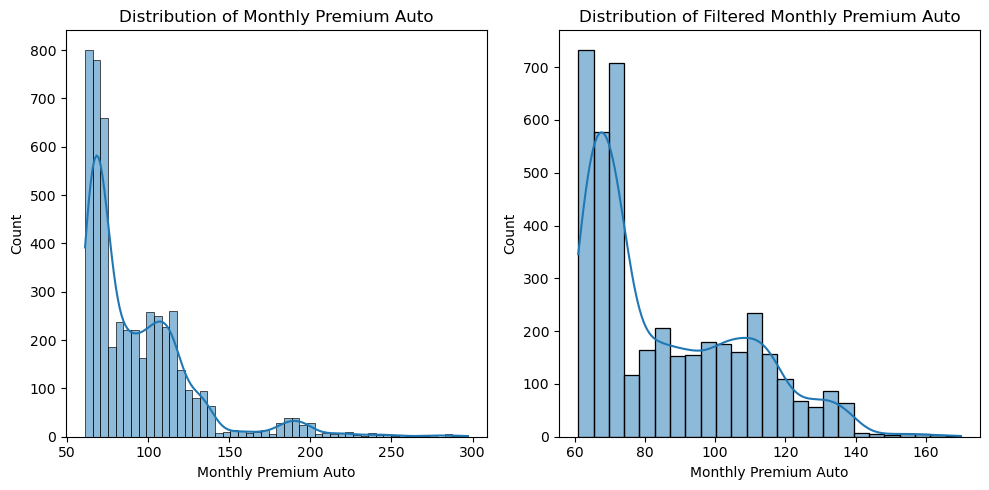

In [175]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(clv['Monthly Premium Auto'], kde=True)
plt.title('Distribution of Monthly Premium Auto')

plt.subplot(1, 2, 2)
sns.histplot(clv_filtered['Monthly Premium Auto'], kde=True)
plt.title('Distribution of Filtered Monthly Premium Auto')

plt.tight_layout()
plt.show()

**81.7%** of the data in the column 'Monthly Premium Auto' is below $170.

### **Total Claim Amount**

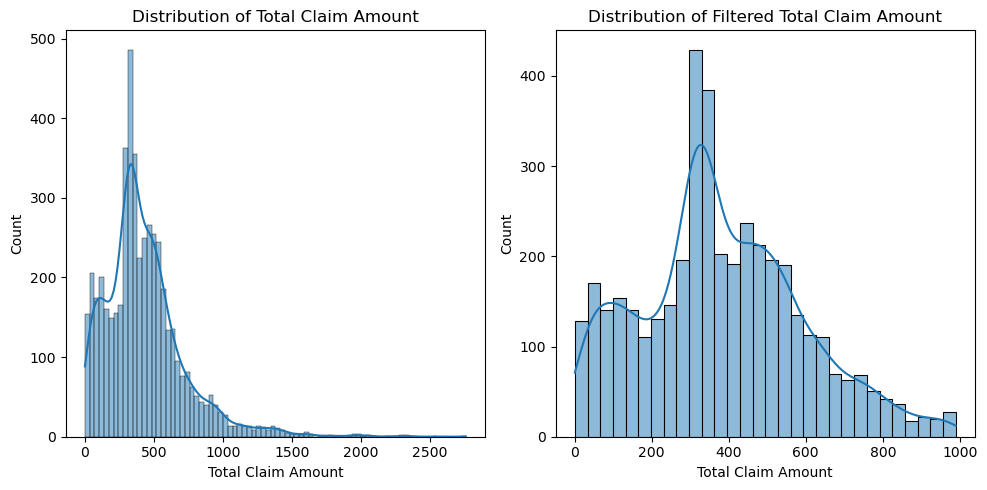

In [177]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(clv['Total Claim Amount'], kde=True)
plt.title('Distribution of Total Claim Amount')

plt.subplot(1, 2, 2)
sns.histplot(clv_filtered['Total Claim Amount'], kde=True)
plt.title('Distribution of Filtered Total Claim Amount')

plt.tight_layout()
plt.show()

**81.7%** of the data in the column 'Total Claim Amount' is below $1000.

### **Income**

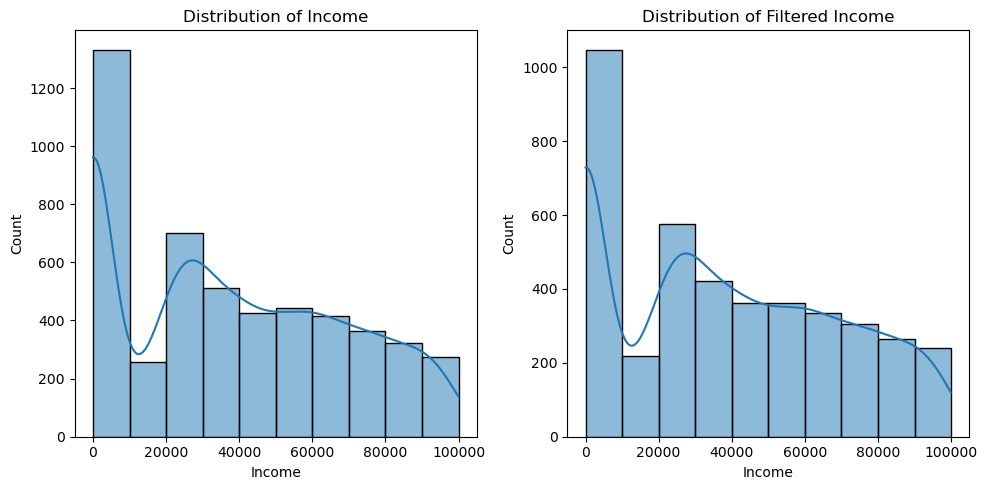

In [178]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(clv['Income'], kde=True, bins=range(0, int(clv['Income'].max())+10000, 10000))
plt.title('Distribution of Income')

plt.subplot(1, 2, 2)
sns.histplot(clv_filtered['Income'], kde=True, bins=range(0, int(clv_filtered['Income'].max())+10000, 10000))
plt.title('Distribution of Filtered Income')

plt.tight_layout()
plt.show()

In both filtered and unfiltered datasets, the highest population of customers has an income in the range of 0-10000.

### **Customer Lifetime Value**

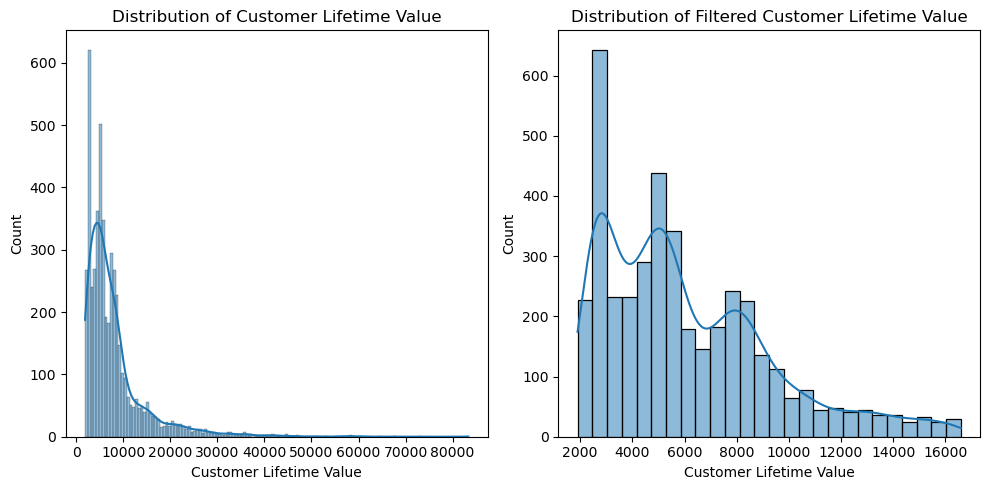

In [179]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(clv['Customer Lifetime Value'], kde=True)
plt.title('Distribution of Customer Lifetime Value')

plt.subplot(1, 2, 2)
sns.histplot(clv_filtered['Customer Lifetime Value'], kde=True)
plt.title('Distribution of Filtered Customer Lifetime Value')

plt.tight_layout()
plt.show()

**81.7%** of the data in the column 'Customer Lifetime Value' is below 17000.

# **Modelling**

## **Encoding**

We will encode Coverage, Renew Offer Type, Marital Status, Vehicle Class, and EmploymentStatus with one-hot encoder. Education will be encoded with an ordinal encoder.

For scaling, Number of Policies, Monthly Premium Auto, Total Claim Amount, and Income will be scaled using robust scaling.

We will then compare the performance of the model with and without scaling to select the better model.

In [7]:
ohe = ['Coverage', 'Renew Offer Type', 'Marital Status', 'Vehicle Class', 'EmploymentStatus']
ordinal = ['Education']
scale = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

education_level = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

In [8]:
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(), ohe),
    ('ordinal', OrdinalEncoder(categories=[education_level]), ordinal)
], remainder='passthrough')

preproc_scaling = ColumnTransformer([
    ('onehot', OneHotEncoder(), ohe),
    ('ordinal', OrdinalEncoder(categories=[education_level]), ordinal),
    ('scaling', RobustScaler(), scale)
], remainder='passthrough')

## **Data Splitting**

We will split the data into features and target. The target will be Customer Lifetime Value, represented by y, and we will use all other columns except Customer Lifetime Value for the features.

Next, we will perform another split for the filtered dataset.

In [10]:
X = clv.drop(columns='Customer Lifetime Value')
y = clv['Customer Lifetime Value']

X_filtered = clv_filtered.drop(columns='Customer Lifetime Value')
y_filtered = clv_filtered['Customer Lifetime Value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2024
)

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered,
    y_filtered,
    test_size=0.2,
    random_state=2024
)

## **Model Benchmarking**

### **Defining Model**

For model benchmarking, we will utilize the following algorithms:
- Linear Regression
- Ridge
- Lasso
- Elastic Net
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine
- K Nearest Neighbors
- Neural Network (MLP)

Additionally, we will compare the performance of models with and without outliers, as well as with and without scaling.

In [5]:

linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svm = SVR()
knn = KNeighborsRegressor()
mlp = MLPRegressor()

models = [linreg, ridge, lasso, en, dt, rf, gb, svm, knn, mlp]

### **Without Scaling**

In [18]:
RMSE_scores = []
RMSE_mean = []
RMSE_std = []

MAE_scores = []
MAE_mean = []
MAE_std = []

R2_scores = []
R2_mean = []
R2_std = []

MAPE_scores = []
MAPE_mean = []
MAPE_std = []

for model in models:
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    cv_RMSE = cross_val_score(pipe, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error')
    cv_MAE = cross_val_score(pipe, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    cv_R2 = cross_val_score(pipe, X_train, y_train, cv=crossval, scoring='r2')
    cv_MAPE = cross_val_score(pipe, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    
    RMSE_scores.append(cv_RMSE)
    RMSE_mean.append(-cv_RMSE.mean())
    RMSE_std.append(cv_RMSE.std())
    
    MAE_scores.append(cv_MAE)
    MAE_mean.append(-cv_MAE.mean())
    MAE_std.append(cv_MAE.std())

    R2_scores.append(cv_R2)
    R2_mean.append(cv_R2.mean())
    R2_std.append(cv_R2.std())

    MAPE_scores.append(cv_MAPE)
    MAPE_mean.append(-cv_MAPE.mean())
    MAPE_std.append(cv_MAPE.std())

In [19]:
result = pd.DataFrame({
    'Method' : ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Neural Network'],
    'RMSE Mean' : RMSE_mean,
    'RMSE std' : RMSE_std,
    'MAE Mean' : MAE_mean,
    'MAE std' : MAE_std,
    'R2 Mean' : R2_mean,
    'R2 std' : R2_std,
    'MAPE Mean' : MAPE_mean,
    'MAPE std' : MAPE_std

})
result.sort_values('MAPE Mean')

,Method,RMSE Mean,RMSE std,MAE Mean,MAE std,R2 Mean,R2 std,MAPE Mean,MAPE std
5,Random Forest,4071.883894,373.660423,0.122010,0.008614,0.654956,0.020777,0.122446,0.008521
4,Decision Tree,5437.030292,278.702756,0.141346,0.011190,0.383971,0.063988,0.139160,0.009463
6,Gradient Boosting,3932.358522,339.888556,0.150117,0.005210,0.677286,0.022661,0.150417,0.005373
7,SVM,7273.715315,621.328594,0.518966,0.006326,-0.102054,0.014353,0.518966,0.006326
2,Lasso,6304.902372,451.665107,0.595384,0.021664,0.170039,0.019200,0.595384,0.021664
1,Ridge,6305.594004,452.479579,0.595450,0.021555,0.169871,0.019137,0.595450,0.021555
0,Linear Regression,6306.875448,453.091589,0.595554,0.021477,0.169540,0.019235,0.595554,0.021477
3,Elastic Net,6304.807802,453.185706,0.599243,0.023888,0.170159,0.016623,0.599243,0.023888
9,Neural Network,6416.929232,477.131734,0.614318,0.063472,0.143179,0.015061,0.608188,0.044433
8,KNN,7231.917307,499.155147,0.726738,0.034883,-0.092532,0.032968,0.726738,0.034883


After conducting model benchmarking, the Mean Absolute Percentage Error (MAPE) emerged as the chosen benchmarking score, with lower MAPE values indicating better performance due to their smaller error margins.

Here are the top 3 results:

1. **Random Forest** achieved the lowest MAPE mean, which is **0.122446**.
2. **Decision Tree** attained the second-lowest MAPE mean, which is **0.139160**.
3. **Gradient Boosting** obtained the third-lowest MAPE mean, which is **0.150417**.

### **Without Outliers**

In [40]:
RMSE_scores = []
RMSE_mean = []
RMSE_std = []

MAE_scores = []
MAE_mean = []
MAE_std = []

R2_scores = []
R2_mean = []
R2_std = []

MAPE_scores = []
MAPE_mean = []
MAPE_std = []

for model in models:
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    cv_RMSE = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='neg_root_mean_squared_error')
    cv_MAE = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    cv_R2 = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='r2')
    cv_MAPE = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    
    RMSE_scores.append(cv_RMSE)
    RMSE_mean.append(-cv_RMSE.mean())
    RMSE_std.append(cv_RMSE.std())
    
    MAE_scores.append(cv_MAE)
    MAE_mean.append(-cv_MAE.mean())
    MAE_std.append(cv_MAE.std())

    R2_scores.append(cv_R2)
    R2_mean.append(cv_R2.mean())
    R2_std.append(cv_R2.std())

    MAPE_scores.append(cv_MAPE)
    MAPE_mean.append(-cv_MAPE.mean())
    MAPE_std.append(cv_MAPE.std())

In [41]:
result_filtered = pd.DataFrame({
    'Method' : ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Neural Network'],
    'RMSE Mean' : RMSE_mean,
    'RMSE std' : RMSE_std,
    'MAE Mean' : MAE_mean,
    'MAE std' : MAE_std,
    'R2 Mean' : R2_mean,
    'R2 std' : R2_std,
    'MAPE Mean' : MAPE_mean,
    'MAPE std' : MAPE_std

})
result_filtered.sort_values('MAPE Mean')

,Method,RMSE Mean,RMSE std,MAE Mean,MAE std,R2 Mean,R2 std,MAPE Mean,MAPE std
5,Random Forest,909.649194,74.798777,0.041130,0.001099,0.919948,0.012759,0.041060,0.000813
6,Gradient Boosting,887.920504,57.955726,0.050497,0.002130,0.923591,0.009734,0.050322,0.002079
4,Decision Tree,1234.168120,108.649028,0.051240,0.003923,0.850939,0.029807,0.051714,0.004282
2,Lasso,2807.265878,74.602151,0.391685,0.012234,0.238501,0.035510,0.391685,0.012234
1,Ridge,2807.964857,74.752265,0.391703,0.012300,0.238129,0.035405,0.391703,0.012300
0,Linear Regression,2808.084666,74.728859,0.391713,0.012320,0.238066,0.035367,0.391713,0.012320
3,Elastic Net,2800.954811,76.066002,0.396528,0.012841,0.241938,0.035524,0.396528,0.012841
9,Neural Network,2907.755120,64.801719,0.433448,0.015950,0.190078,0.027203,0.443720,0.017585
7,SVM,3319.961605,70.564304,0.454726,0.020736,-0.064371,0.022022,0.454726,0.020736
8,KNN,3233.859366,62.513262,0.487971,0.022332,-0.010122,0.027602,0.487971,0.022332


After conducting model benchmarking with the data without outliers, here are the results:

1. **Random Forest** achieved the lowest MAPE mean, which is **0.041060**.
2. **Gradient Boosting** attained the second-lowest MAPE mean, which is **0.050322**.
3. **Decision Tree** obtained the third-lowest MAPE mean, which is **0.051714**.

The data without outliers yields a lower MAPE mean than the data with outliers. Therefore, we will proceed with further processing using the data without outliers.

### **With Scaling**

In [22]:
RMSE_scores = []
RMSE_mean = []
RMSE_std = []

MAE_scores = []
MAE_mean = []
MAE_std = []

R2_scores = []
R2_mean = []
R2_std = []

MAPE_scores = []
MAPE_mean = []
MAPE_std = []

for model in models:
    pipe = Pipeline([
        ('preprocess', preproc_scaling),
        ('model', model)
    ])
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    cv_RMSE = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='neg_root_mean_squared_error')
    cv_MAE = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    cv_R2 = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='r2')
    cv_MAPE = cross_val_score(pipe, X_train_filtered, y_train_filtered, cv=crossval, scoring='neg_mean_absolute_percentage_error')
    
    RMSE_scores.append(cv_RMSE)
    RMSE_mean.append(-cv_RMSE.mean())
    RMSE_std.append(cv_RMSE.std())
    
    MAE_scores.append(cv_MAE)
    MAE_mean.append(-cv_MAE.mean())
    MAE_std.append(cv_MAE.std())

    R2_scores.append(cv_R2)
    R2_mean.append(cv_R2.mean())
    R2_std.append(cv_R2.std())

    MAPE_scores.append(cv_MAPE)
    MAPE_mean.append(-cv_MAPE.mean())
    MAPE_std.append(cv_MAPE.std())

In [23]:
result_scaling = pd.DataFrame({
    'Method' : ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Neural Network'],
    'RMSE Mean' : RMSE_mean,
    'RMSE std' : RMSE_std,
    'MAE Mean' : MAE_mean,
    'MAE std' : MAE_std,
    'R2 Mean' : R2_mean,
    'R2 std' : R2_std,
    'MAPE Mean' : MAPE_mean,
    'MAPE std' : MAPE_std

})
result_scaling.sort_values('MAPE Mean')

,Method,RMSE Mean,RMSE std,MAE Mean,MAE std,R2 Mean,R2 std,MAPE Mean,MAPE std
5,Random Forest,978.746370,33.232564,0.046913,0.002633,0.906197,0.005085,0.046724,0.002283
6,Gradient Boosting,927.283505,52.892513,0.049998,0.003206,0.917025,0.006975,0.050130,0.002824
4,Decision Tree,1308.129919,61.161287,0.057350,0.003259,0.836189,0.028285,0.057126,0.002527
8,KNN,2866.279378,87.636521,0.382457,0.009702,0.204489,0.037351,0.382457,0.009702
0,Linear Regression,2773.590733,77.653976,0.386358,0.005898,0.255352,0.026348,0.386358,0.005898
1,Ridge,2773.752487,77.941056,0.386431,0.006439,0.255267,0.026398,0.386431,0.006439
2,Lasso,2773.340163,77.683978,0.386574,0.006413,0.255481,0.026505,0.386574,0.006413
9,Neural Network,3092.278919,50.954140,0.395308,0.012672,0.086363,0.020999,0.389191,0.015800
7,SVM,3296.866485,70.204237,0.448056,0.007982,-0.051841,0.006963,0.448056,0.007982
3,Elastic Net,2871.649290,66.245427,0.450095,0.004121,0.201857,0.018324,0.450095,0.004121


After conducting model benchmarking with the data with scaling, here are the results:

1. **Random Forest** achieved the lowest MAPE mean, which is **0.046724**.
2. **Gradient Boosting** attained the second-lowest MAPE mean, which is **0.050130**.
3. **Decision Tree** obtained the third-lowest MAPE mean, which is **0.057126**.

When comparing the model with the lowest MAPE (Random Forest) in both scaling and without scaling, there is only a slight difference between the two where scaling yields **0.046724**  and without scaling yields **0.041060** which gives the model without scaling a score advantage of **0.005664**.

Hence we will use the data without outliers and without scaling.

## **Hyperparameter Tuning**

For hyperparameter tuning, we will select specific parameters to tune. To achieve this, we will utilize RandomizedSearch, which offers time efficiency at the cost of fewer tests being conducted.

### **Random Forest**

For Random Forest, we will tune the following hyperparameters: n_estimators, criterion, max_depth, min_samples_split, and min_samples_leaf. We will utilize RandomizedSearch to efficiently search the hyperparameter space.

In [22]:
# Parameter grid for Random Forest
rf_param_grid = {
    'model__n_estimators': range(50,301,50),  # Number of trees in the forest
    'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__max_depth': range(1,10),  # Maximum depth of the tree
    'model__min_samples_split': range(2,11),  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': range(1,10)  # Minimum number of samples required to be at a leaf node
}

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

rf_random_search = RandomizedSearchCV(estimator=rf_pipe, param_distributions=rf_param_grid, n_iter=50, cv=5, scoring='neg_mean_absolute_percentage_error', random_state=2024)

# Perform grid search on the training data
rf_random_search.fit(X_train_filtered, y_train_filtered)

# Get the best hyperparameters
rf_best_params = rf_random_search.best_params_

# Train final model with best hyperparameters
final_model = rf_pipe.set_params(**rf_best_params)
final_model.fit(X_train_filtered, y_train_filtered)

In [66]:
print("Test Mean Absolute Percentage Error (Random Forest):", -rf_random_search.best_score_)
rf_params = pd.DataFrame(rf_best_params.items(), columns=['Hyperparameters', 'Value'])
rf_params

Test Mean Absolute Percentage Error (Random Forest): 0.03739480938150202


,Hyperparameters,Value
0,model__n_estimators,200
1,model__min_samples_split,8
2,model__min_samples_leaf,4
3,model__max_depth,8
4,model__criterion,absolute_error


The best hyperparameters obtained for Random Forest are as follows:

- n_estimators: 200
- min_samples_split: 8
- min_samples_leaf: 4
- max_depth: 8
- criterion: absolute_error

These hyperparameters resulted in a mean absolute percentage error (MAPE) score of 0.038973377587141776.

### **Decision Tree**

For Decision Tree, we will tune the following hyperparameters: max_depth, criterion, splitter, min_samples_split, and min_samples_leaf.

In [24]:
# Parameter grid for DecisionTreeRegressor
dt_param_grid = {
    'model__max_depth': range(1,11),
    'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__splitter': ['best', 'random'],
    'model__min_samples_split': range(2,11),
    'model__min_samples_leaf': range(1,10)
}

# Initialize DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Create full pipeline including preprocessing and DecisionTreeRegressor
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', dt)
])

dt_random_search = RandomizedSearchCV(estimator=dt_pipe, param_distributions=dt_param_grid, n_iter=200, cv=5, scoring='neg_mean_absolute_percentage_error', random_state=2024)

# Perform grid search on the training data
dt_random_search.fit(X_train_filtered, y_train_filtered)

# Get the best hyperparameters
dt_best_params = dt_random_search.best_params_

# Train final model with best hyperparameters
final_dt_model = dt_pipe.set_params(**dt_best_params)
final_dt_model.fit(X_train_filtered, y_train_filtered)

In [68]:
print("Test Mean Absolute Percentage Error (Decision Tree):", -dt_random_search.best_score_)
dt_params = pd.DataFrame(dt_best_params.items(), columns=['Hyperparameters', 'Value'])
dt_params

Test Mean Absolute Percentage Error (Decision Tree): 0.039630372446789


,Hyperparameters,Value
0,model__splitter,best
1,model__min_samples_split,2
2,model__min_samples_leaf,2
3,model__max_depth,9
4,model__criterion,absolute_error


The best hyperparameters obtained for Decision Tree are as follows:

- splitter: best
- min_samples_split: 2
- min_samples_leaf: 2
- max_depth: 9
- criterion: absolute_error

These hyperparameters resulted in a mean absolute percentage error (MAPE) score of 0.04398390452247812.

### **Gradient Boosting**

For Gradient Boosting, we will tune the following hyperparameters: n_estimators, loss, max_depth, and learning_rate.

In [ ]:
# Parameter grid for GradientBoostingRegressor
gb_param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Initialize GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Create full pipeline including preprocessing and GradientBoostingRegressor
gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gb)
])

gb_random_search = RandomizedSearchCV(estimator=gb_pipe, param_distributions=gb_param_grid, n_iter=100, cv=5, scoring='neg_mean_absolute_percentage_error', random_state=2024)

# Perform grid search on the training data
gb_random_search.fit(X_train_filtered, y_train_filtered)

# Get the best hyperparameters
gb_best_params = gb_random_search.best_params_

# Train final model with best hyperparameters
final_gb_model = gb_pipe.set_params(**gb_best_params)
final_gb_model.fit(X_train_filtered, y_train_filtered)

In [76]:
print("Test Mean Absolute Percentage Error (Gradient Boosting):", -gb_random_search.best_score_)
gb_params = pd.DataFrame(gb_best_params.items(), columns=['Hyperparameters', 'Value'])
gb_params

Test Mean Absolute Percentage Error (Gradient Boosting): 0.03211114783680873


,Hyperparameters,Value
0,model__n_estimators,50
1,model__max_depth,5
2,model__loss,huber
3,model__learning_rate,0.1


The best hyperparameters obtained for Gradient Boosting are as follows:

- n_estimators: 50
- max_depth: 5
- loss: huber
- learning_rate: 0.1

These hyperparameters resulted in a mean absolute percentage error (MAPE) score of 0.03430954798337535.

In [71]:

print("Test Mean Absolute Percentage Error (Random Forest):", -rf_random_search.best_score_)
print("Test Mean Absolute Percentage Error (Decision Tree):", -dt_random_search.best_score_)
print("Test Mean Absolute Percentage Error (Gradient Boosting):", -gb_random_search.best_score_)

Test Mean Absolute Percentage Error (Random Forest): 0.03739480938150202
Test Mean Absolute Percentage Error (Decision Tree): 0.039630372446789
Test Mean Absolute Percentage Error (Gradient Boosting): 0.03211114783680873


The evaluation of hyperparameter tuning for the top three models Random Forest, Decision Tree, and Gradient Boosting revealed that Gradient Boosting achieved the most favorable MAPE score of 0.03211114783680873.

### **Performance Comparison**

To assess the effectiveness of the optimization process, we will compare the performance of the best model (Gradient Boosting) before and after hyperparameter tuning.

**Before Tuning**

In [72]:
result_filtered[result_filtered['Method'] == 'Gradient Boosting'][['Method', 'MAPE Mean']]

,Method,MAPE Mean
6,Gradient Boosting,0.050322


**After Tuning**

In [75]:
pd.DataFrame({
    'Method' : 'Gradient Boosting',
    'MAPE' : -gb_random_search.best_score_
    }, index=[0])

,Method,MAPE
0,Gradient Boosting,0.032111


A noticeable enhancement in performance is demonstrated by the reduced MAPE score observed in the optimized Gradient Boosting model:
- Initial MAPE score: 0.050322
- Tuned MAPE score: 0.032111

### **Predicting Test Set with Best Tuned Model**

Predicting the test set using Gradient Boosting with the chosen hyperparameters.

In [12]:
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('GB', GradientBoostingRegressor(n_estimators=50, max_depth=5, loss='huber', learning_rate=0.1))
])

final_pipe.fit(X_train_filtered, y_train_filtered)

y_pred = final_pipe.predict(X_test_filtered)

mape = mean_absolute_percentage_error(y_test_filtered, y_pred)

best_model = pd.DataFrame({
    'Method' : 'Gradient Boosting',
    'MAPE' : mape
}, index=[0])
best_model

,Method,MAPE
0,Gradient Boosting,0.034286


The MAPE for the best tuned model is 0.034286

### **Saving Final Model**

In [14]:
import pickle

pickle.dump(final_pipe, open('Final_Model_CLV_Prediction_Joash.sav', 'wb'))

### **Residual Analysis**

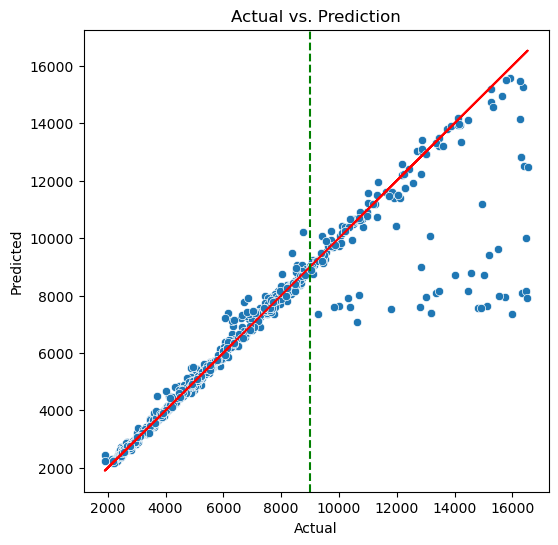

In [77]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_filtered, y=y_pred)
plt.title('Actual vs. Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot the regression line
plt.plot(y_test_filtered, y_test_filtered, color='red')

# Plot a vertical line at x=9000
plt.axvline(x=9000, color='green', linestyle='--', label='Vertical Line')
plt.show()

- The red regression line represents the line of perfect prediction, where the actual CLV perfectly matches the predicted CLV.
- Above the vertical green line at 9000, we observe that the predictions start to become less accurate.

## **Feature Importance**

To assess which features have the most significant impact on customer lifetime value, we will conduct a feature importance analysis.

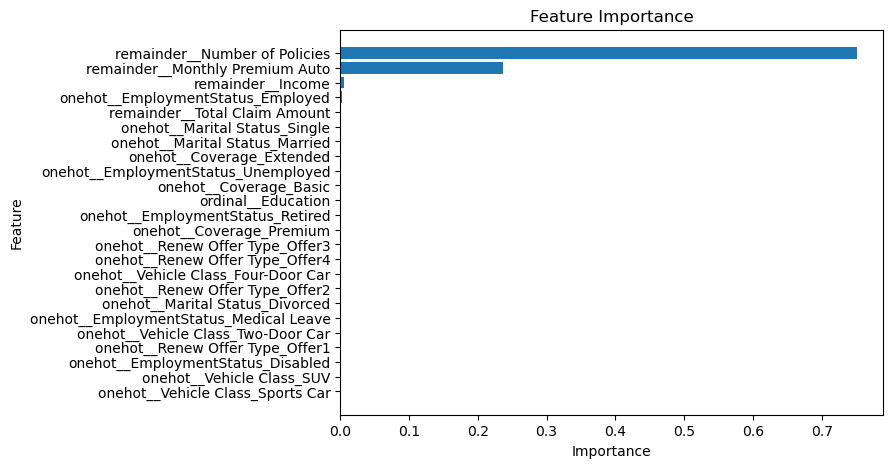

In [48]:
# Get feature importance from the Gradient Boosting model step
feature_importance = pipe.named_steps['GB'].feature_importances_

feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_df.sort_values('Importance', ascending=True, inplace=True)

# Plot the feature importance
plt.figure(figsize=(7, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# **Conclusion and Recommendation**

## **Conclusion**

Based on the conducted tests, the following conclusions can be drawn:
1. Among the 10 models listed, Random Forest, Decision Tree, and Gradient Boosting emerge as the top 3 best-performing models.
2. The dataset without outliers consistently outperforms the dataset with outliers.
3. There is no significant difference in the test scores with or without scaling.
4. Although Random Forest initially showed the best performance, after hyperparameter tuning, Gradient Boosting emerged as the superior model.
5. The accuracy above 9000 CLV of the final best model become less accurate.

## **Recommendation**



Here are some recommendations we can consider:
1. To potentially enhance the MAPE score further, we could explore adding additional parameters for testing during hyperparameter tuning.
2. We may also experiment with grid search instead of randomized search to systematically explore a broader range of hyperparameter combinations.
3. Given that all tree-based models yielded superior results based on our observations, we might want to incorporate more tree-based models into our model benchmarking process to ensure comprehensive evaluation.
4. It's essential to prioritize features such as `Number of Policies`, `Monthly Premium Auto`, and `Income`, as they appear to be significant predictors based on our analysis. These features should be given special attention during feature selection and model training.